In [1]:
# Import the required modules
import os
import numpy as np

from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

import QuantumRingsLib
from QuantumRingsLib import QuantumRingsProvider
from quantumrings.toolkit.qiskit import QrBackendV2, QrJobV1
from quantumrings.toolkit.qiskit import QrSamplerV1 as Sampler

from matplotlib import pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv() # take environment variables from `.env` file
QUANTUM_RINGS_TOKEN = os.getenv("QUANTUM_RINGS_TOKEN", "")
QUANTUM_RINGS_ACCOUNT_NAME = os.getenv("QUANTUM_RINGS_ACCOUNT_NAME", "")

In [3]:
qr_provider = QuantumRingsProvider(token=QUANTUM_RINGS_TOKEN, name=QUANTUM_RINGS_ACCOUNT_NAME)
print(f"Max Qubits: {qr_provider.active_account()['max_qubits']}")

Max Qubits: 128


In [4]:
shots = 1000
num_qubits = 3
q = QuantumRegister(num_qubits , 'q')
c = ClassicalRegister(num_qubits , 'c')
qc = QuantumCircuit(q, c)

# Create the GHZ state (Greenberger-Horne-Zeilinger)
qc.h(0)
for i in range (qc.num_qubits - 1):
    qc.cx(i, i + 1)
qc.measure_all()

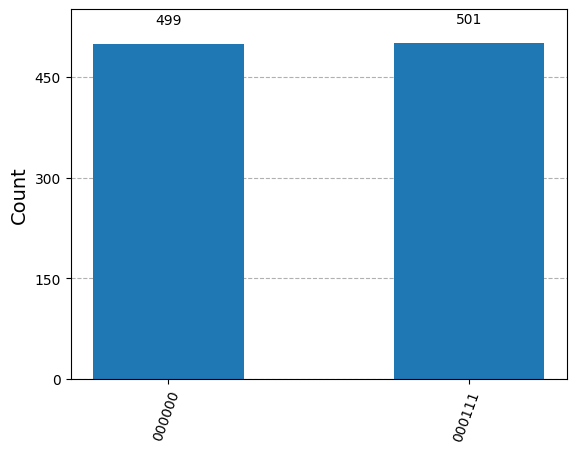

In [5]:
# Execute the quantum code
mybackend = QrBackendV2(qr_provider, num_qubits=qc.num_qubits)
qc_transpiled = transpile(qc, mybackend, initial_layout=[i for i in range(0, qc.num_qubits)])
job = mybackend.run(qc_transpiled, shots = shots)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
# a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()

In [12]:
theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]

# initialization of the sampler
sampler = Sampler(mybackend)

[{'00': 0.48828125, '11': 0.51171875}]


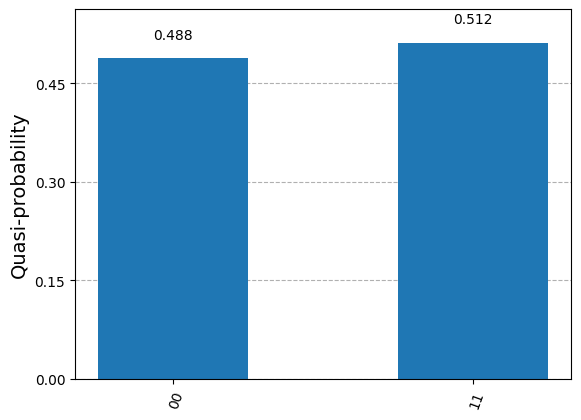

In [13]:
# Sampler runs a job on the Bell circuit
job = sampler.run(circuits=[bell], parameter_values=[[]], parameters=[[]])
job_result = job.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])

plot_histogram(job_result.quasi_dists[0].binary_probabilities())

[{'00': 0.1220703125, '01': 0.359375, '10': 0.1005859375, '11': 0.41796875}, {'00': 0.18359375, '01': 0.6748046875, '10': 0.1044921875, '11': 0.037109375}]


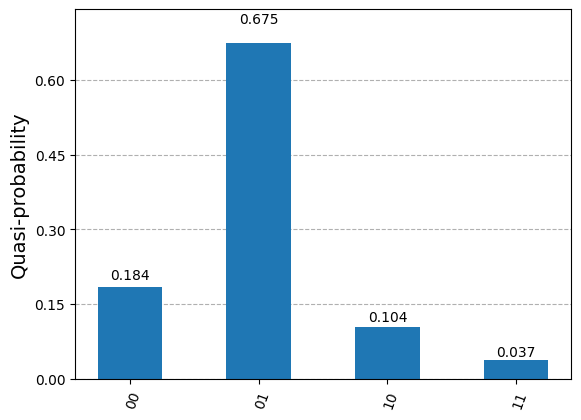

In [14]:
# Sampler runs a job on the parameterized circuits
job2 = sampler.run(
    circuits=[pqc, pqc2],
    parameter_values=[theta1, theta2],
    parameters=[pqc.parameters, pqc2.parameters])
job_result = job2.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])

plot_histogram(job_result.quasi_dists[1].binary_probabilities())